In [11]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load data from pickle file
file_path = "/data02/gkim/stem_cell_jwshin/data/23_SEC1H5_wider_v3_allh_onRA_bags/masks/test/00_RA/230425.173926.H9_12hour_treat.014.Group1.A1.S014.pkl"
with open(file_path, 'rb') as f:
    data = pickle.load(f)

# Extract 'holes' and 'colony' from the loaded data
holes = data['holes']
colonies = data['colony']  # 'colony' key instead of 'colonies'

# Visualize the 'colony' contours
image_shape = colonies[0].shape  # Shape of the image
image = np.zeros(image_shape, dtype=np.uint8)  # Create an empty image



In [12]:
colonies[0]

array([[[726, 125]],

       [[725, 126]],

       [[724, 126]],

       ...,

       [[726, 127]],

       [[726, 126]],

       [[727, 125]]], dtype=int32)

(6882, 2)


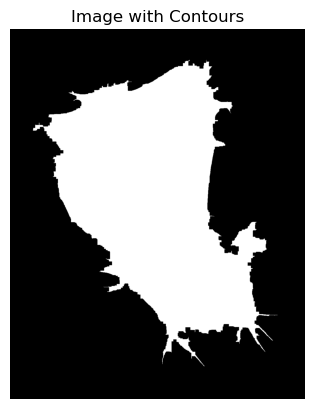

In [13]:
# Create an empty image with the same dimensions as the original image
image = np.zeros((1496,1194), dtype=np.uint8)

# Draw contours on the empty image
for colony in colonies:
    # Convert contour to list format
    contour_list = colony.squeeze().tolist()

    # Check if contour has points
    if contour_list:
        # Convert contour list to numpy array
        contour_array = np.array(contour_list)
        if len(contour_array.shape)<2:
            continue
        print(contour_array.shape)

        # Draw contour on the image
        cv2.drawContours(image, [contour_array], -1, (255), thickness=cv2.FILLED)

# Display the image with contours
plt.imshow(image, cmap='gray')
plt.title("Image with Contours")
plt.axis('off')
plt.show()

In [3]:
for colony in colonies:
    # Convert contour to list format
    contour_list = colony.squeeze().tolist()

    # Convert contour list to numpy array
    contour_array = np.array(contour_list)

    # Draw contour on the image
    cv2.drawContours(image, [contour_array], -1, (255), thickness=cv2.FILLED)


TypeError: Invalid shape (13, 1, 2) for image data

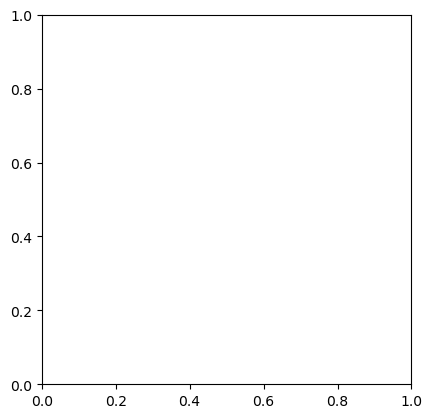

In [4]:

# Display the image with contours
plt.imshow(image, cmap='gray')
plt.title("Colony Contours")
plt.axis('off')
plt.show()